# The Double Pendulum Simulation

The double pendulum system consists of two pendulums attached end to end, with the second pendulum hanging from the first. It exhibits complex and chaotic motion due to its non-linear dynamics. 

## Equations of Motion

Using Lagrangian mechanics, the equations of motion for the double pendulum can be derived. Let $\theta_1$ and $\theta_2$ be the angles of the first and second pendulums with the vertical, respectively. The kinetic and potential energies of the system are:

1. **Kinetic Energy ($T$)**:
   \begin{equation}
   T = \frac{1}{2} m_1 L_1^2 \dot{\theta_1}^2 + \frac{1}{2} m_2 \left( L_1^2 \dot{\theta_1}^2 + L_2^2 \dot{\theta_2}^2 + 2 L_1 L_2 \dot{\theta_1} \dot{\theta_2} \cos(\theta_1 - \theta_2) \right)
   \end{equation}

2. **Potential Energy ($V$)**:
   \begin{equation}
   V = - (m_1 + m_2) g L_1 \cos(\theta_1) - m_2 g L_2 \cos(\theta_2)
   \end{equation}

3. **Lagrangian ($L$)**:
   \begin{equation}
   L = T - V
   \end{equation}

Using the Euler-Lagrange equations, the equations of motion are:
\begin{equation}
(m_1 + m_2)L_1^2 \ddot{\theta_1} + m_2 L_1 L_2 \ddot{\theta_2} \cos(\theta_1 - \theta_2) + m_2 L_1 L_2 \dot{\theta_2}^2 \sin(\theta_1 - \theta_2) = - (m_1 + m_2) g L_1 \sin(\theta_1)
\end{equation}

\begin{equation}
m_2 L_2^2 \ddot{\theta_2} + m_2 L_1 L_2 \ddot{\theta_1} \cos(\theta_1 - \theta_2) - m_2 L_1 L_2 \dot{\theta_1}^2 \sin(\theta_1 - \theta_2) = - m_2 g L_2 \sin(\theta_2)
\end{equation}

These equations are solved numerically using methods such as Runge-Kutta to compute the angles $\theta_1$ and $\theta_2$ over time.

## Chaotic Behavior

The double pendulum is a well-known example of a chaotic system. Small differences in initial conditions can lead to vastly different trajectories, making long-term prediction impossible despite deterministic equations. This sensitivity to initial conditions is a hallmark of chaos theory.

By numerically solving these equations and visualizing the results, we can observe and analyze the fascinating dynamics and chaotic behavior of the double pendulum.

## Numerical Solution Method: Runge-Kutta

To solve the double pendulum's equations of motion numerically, we use the **Runge-Kutta method**, specifically the fourth-order Runge-Kutta (RK4) method, due to its balance between accuracy and computational efficiency.

### Steps of the Runge-Kutta Method

1. **State Vector**: Define the state vector $\mathbf{y} = [\theta_1, \dot{\theta_1}, \theta_2, \dot{\theta_2}]$.

2. **Equations of Motion**: Transform the second-order differential equations into a system of first-order equations:
   \begin{equation}
   \mathbf{\dot{y}} = \mathbf{f}(t, \mathbf{y})
   \end{equation}

3. **RK4 Integration Steps**:
   - Calculate the intermediate values:
     \begin{equation}
     k_1 = h \mathbf{f}(t_n, \mathbf{y}_n)
     \end{equation}
     \begin{equation}
     k_2 = h \mathbf{f}(t_n + \frac{h}{2}, \mathbf{y}_n + \frac{k_1}{2})
     \end{equation}
     \begin{equation}
     k_3 = h \mathbf{f}(t_n + \frac{h}{2}, \mathbf{y}_n + \frac{k_2}{2})
     \end{equation}
     \begin{equation}
     k_4 = h \mathbf{f}(t_n + h, \mathbf{y}_n + k_3)
     \end{equation}

   - Update the state vector:
     \begin{equation}
     \mathbf{y}_{n+1} = \mathbf{y}_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
     \end{equation}

4. **Iterate Over Time**: Repeat the steps over the desired time span to evolve the state vector $\mathbf{y}$.

## Implementation in Python

In Python, we often use the `solve_ivp` function from the SciPy library, which includes RK4 as an option. This method handles the integration steps and provides a convenient interface for solving initial value problems.


In [29]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5   
plt.rcParams['ytick.major.size'] = 5   
plt.rcParams['xtick.major.width'] = 1   
plt.rcParams['ytick.major.width'] = 1   
plt.rcParams['legend.fontsize'] = 14

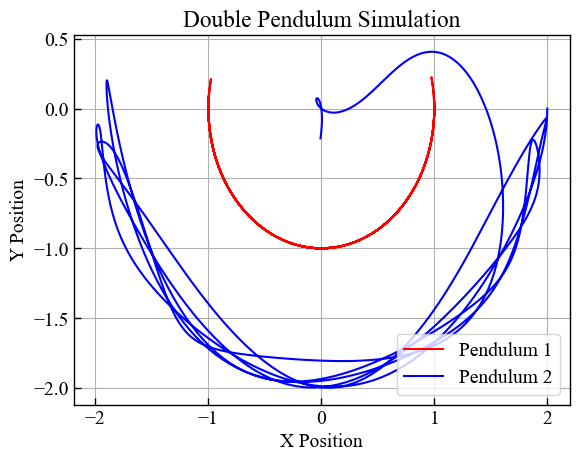

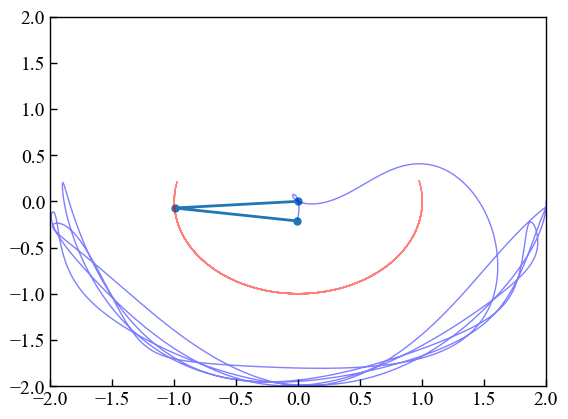

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation, PillowWriter

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L1 = 1.0  # Length of the first pendulum (m)
L2 = 1.0  # Length of the second pendulum (m)
m1 = 1.0  # Mass of the first pendulum (kg)
m2 = 1.0  # Mass of the second pendulum (kg)

def equations(t, y):
    """
    Defines the differential equations for the double pendulum system.
    
    Parameters:
    t : float
        Time variable
    y : list
        List containing the current values of theta1, z1, theta2, z2
    
    Returns:
    list
        List containing the derivatives [theta1dot, z1dot, theta2dot, z2dot]
    """
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
    theta1dot = z1
    z1dot = (m2 * g * np.sin(theta2) * c - m2 * s * (L1 * z1**2 * c + L2 * z2**2) -
             (m1 + m2) * g * np.sin(theta1)) / L1 / (m1 + m2 * s**2)
    theta2dot = z2
    z2dot = ((m1 + m2) * (L1 * z1**2 * s - g * np.sin(theta2) + g * np.sin(theta1) * c) +
             m2 * L2 * z2**2 * s * c) / L2 / (m1 + m2 * s**2)
    return [theta1dot, z1dot, theta2dot, z2dot]

def simulate_double_pendulum(y0, t_span, t_eval):
    """
    Simulates the double pendulum system using numerical integration.
    
    Parameters:
    y0 : list
        Initial conditions [theta1, z1, theta2, z2]
    t_span : list
        Time span for the simulation [start, end]
    t_eval : numpy array
        Array of time points at which to store the solution
    
    Returns:
    solution : OdeSolution
        Object containing the solution of the differential equation
    """
    solution = solve_ivp(equations, t_span, y0, t_eval=t_eval)
    return solution

def plot_double_pendulum(solution):
    """
    Plots the trajectory of the double pendulum.
    
    Parameters:
    solution : OdeSolution
        Object containing the solution of the differential equation
    """
    theta1, theta2 = solution.y[0], solution.y[2]
    
    # Calculate positions of the pendulums
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    
    plt.figure()
    plt.plot(x1, y1,'r-', label='Pendulum 1')
    plt.plot(x2, y2,'b-', label='Pendulum 2')
    plt.legend()
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Double Pendulum Simulation')
    plt.grid()
    plt.show()

def animate_double_pendulum(solution):
    """
    Animates the motion of the double pendulum.
    
    Parameters:
    solution : OdeSolution
        Object containing the solution of the differential equation
    """
    theta1, theta2 = solution.y[0], solution.y[2]
    
    # Calculate positions of the pendulums
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    
    fig, ax = plt.subplots()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    line, = ax.plot([], [], 'o-', lw=2)
    trace1, = ax.plot([], [], 'r-', lw=1, alpha=0.5)
    trace2, = ax.plot([], [], 'b-', lw=1, alpha=0.5)
    
    def init():
        line.set_data([], [])
        trace1.set_data([], [])
        trace2.set_data([], [])
        return line, trace1, trace2
    
    def update(frame):
        thisx = [0, x1[frame], x2[frame]]
        thisy = [0, y1[frame], y2[frame]]
        line.set_data(thisx, thisy)
        trace1.set_data(x1[:frame], y1[:frame])
        trace2.set_data(x2[:frame], y2[:frame])
        return line, trace1, trace2
    
    ani = FuncAnimation(fig, update, frames=range(len(x1)), init_func=init, blit=True, interval=20)
    
    # Save the animation as a GIF file
    ani.save("double_pendulum_simulation.gif", writer=PillowWriter(fps=10))
    
    # Display the animation in the notebook
    from IPython.display import HTML
    return HTML(ani.to_html5_video())

# Initial conditions: [theta1, z1, theta2, z2]
y0 = [np.pi / 2, 0, np.pi / 2, 0]
t_span = [0, 10]
t_eval = np.linspace(0, 10, 1000)

# Run the simulation
solution = simulate_double_pendulum(y0, t_span, t_eval)

# Plot the results
plot_double_pendulum(solution)

# Animate the results
animate_double_pendulum(solution)


# Double Pendulum Chaotic Behaviour

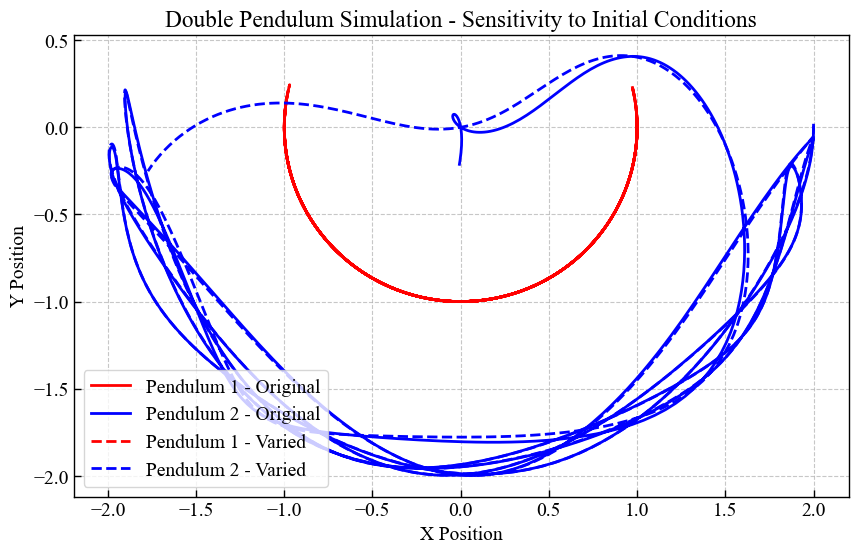

In [40]:
# Slightly different initial conditions
y0_variation = [np.pi / 2 + 0.01, 0, np.pi / 2 + 0.01, 0]

# Run the simulation with varied initial conditions
solution_variation = simulate_double_pendulum(y0_variation, t_span, t_eval)

# Plot both trajectories
def plot_comparison(solution1, solution2):
    theta1_1, theta2_1 = solution1.y[0], solution1.y[2]
    theta1_2, theta2_2 = solution2.y[0], solution2.y[2]
    
    x1_1 = L1 * np.sin(theta1_1)
    y1_1 = -L1 * np.cos(theta1_1)
    x2_1 = x1_1 + L2 * np.sin(theta2_1)
    y2_1 = y1_1 - L2 * np.cos(theta2_1)
    
    x1_2 = L1 * np.sin(theta1_2)
    y1_2 = -L1 * np.cos(theta1_2)
    x2_2 = x1_2 + L2 * np.sin(theta2_2)
    y2_2 = y1_2 - L2 * np.cos(theta2_2)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x1_1, y1_1, 'r-', label='Pendulum 1 - Original', lw=2)
    plt.plot(x2_1, y2_1, 'b-', label='Pendulum 2 - Original', lw=2)
    plt.plot(x1_2, y1_2, 'r--', label='Pendulum 1 - Varied', lw=2)
    plt.plot(x2_2, y2_2, 'b--', label='Pendulum 2 - Varied', lw=2)
    plt.legend()
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Double Pendulum Simulation - Sensitivity to Initial Conditions')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Plot the comparison
plot_comparison(solution, solution_variation)


# Interactive Double Pendulum

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from IPython.display import display

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)

def equations(t, y, L1, L2, m1, m2):
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
    theta1dot = z1
    z1dot = (m2 * g * np.sin(theta2) * c - m2 * s * (L1 * z1**2 * c + L2 * z2**2) -
             (m1 + m2) * g * np.sin(theta1)) / L1 / (m1 + m2 * s**2)
    theta2dot = z2
    z2dot = ((m1 + m2) * (L1 * z1**2 * s - g * np.sin(theta2) + g * np.sin(theta1) * c) +
             m2 * L2 * z2**2 * s * c) / L2 / (m1 + m2 * s**2)
    return [theta1dot, z1dot, theta2dot, z2dot]

def simulate_double_pendulum(y0, t_span, t_eval, L1, L2, m1, m2):
    solution = solve_ivp(equations, t_span, y0, args=(L1, L2, m1, m2), t_eval=t_eval)
    return solution

def plot_double_pendulum(solution, L1, L2):
    theta1, theta2 = solution.y[0], solution.y[2]
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x1, y1, 'r-', label='Pendulum 1', lw=2)
    plt.plot(x2, y2, 'b-', label='Pendulum 2', lw=2)
    plt.legend()
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Double Pendulum Simulation')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def interactive_double_pendulum(theta1_initial, theta2_initial, L1, L2, m1, m2):
    y0 = [theta1_initial, 0, theta2_initial, 0]
    t_span = [0, 10]
    t_eval = np.linspace(0, 10, 1000)
    
    solution = simulate_double_pendulum(y0, t_span, t_eval, L1, L2, m1, m2)
    plot_double_pendulum(solution, L1, L2)

def reset_values(b):
    theta1_slider.value = np.pi / 2
    theta2_slider.value = np.pi / 2
    L1_input.value = 1.0
    L2_input.value = 1.0
    m1_input.value = 1.0
    m2_input.value = 1.0

    
reset_button = widgets.Button(description='Reset')
theta1_slider = widgets.FloatSlider(value=np.pi / 2, min=0, max=2 * np.pi, step=0.01, description='Theta1:')
theta2_slider = widgets.FloatSlider(value=np.pi / 2, min=0, max=2 * np.pi, step=0.01, description='Theta2:')
L1_input = widgets.FloatText(value=1.0, description='Length 1:')
L2_input = widgets.FloatText(value=1.0, description='Length 2:')
m1_input = widgets.FloatText(value=1.0, description='Mass 1:')
m2_input = widgets.FloatText(value=1.0, description='Mass 2:')

reset_button.on_click(reset_values)

interactive_plot = widgets.interactive(interactive_double_pendulum, 
                                       theta1_initial=theta1_slider, 
                                       theta2_initial=theta2_slider, 
                                       L1=L1_input, L2=L2_input, 
                                       m1=m1_input, m2=m2_input)

display(interactive_plot, reset_button)


interactive(children=(FloatSlider(value=1.5707963267948966, description='Theta1:', max=6.283185307179586, step…

Button(description='Reset', style=ButtonStyle())

In [ ]:
st.subtitle('Wait for the animation to be compiled! It might take up to a few minutes.')